c:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAPE: 0.13%
            Valor Real  Valor Previsto
2024-01-01      189664   217652.787630
2024-02-01      185982   210431.299148
2024-03-01      184109   212611.697198
2024-04-01      199395   206468.960823
2024-05-01      177871   199342.253782
2024-06-01      184680   197456.555632
2024-07-01      161149   194391.636880
2024-08-01      169700   196347.076628
2024-09-01      180721   194195.140748
2024-10-01      173691   200644.738853
2024-11-01      179036   209489.400318
2024-12-01      182626   215180.119811


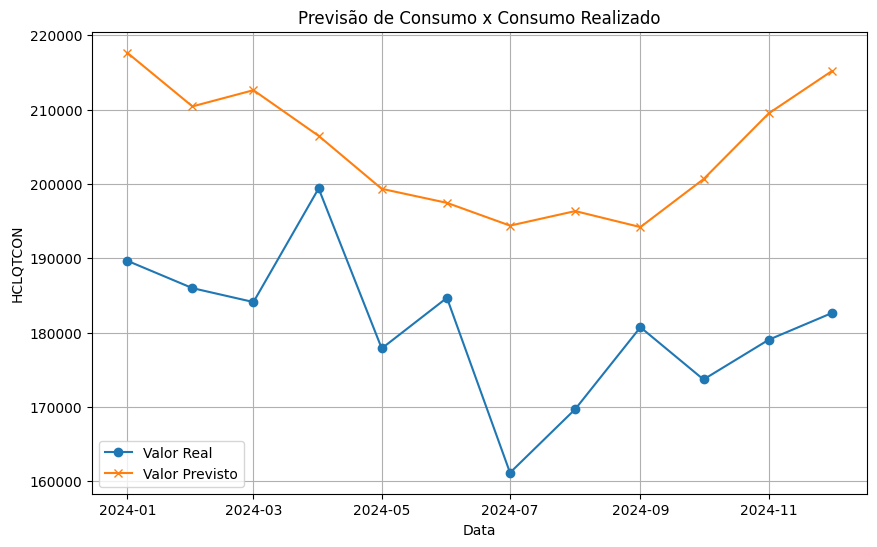

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error as mape
import matplotlib.pyplot as plt
import os

# Função para realizar a previsão e plotar o gráfico
def prever_e_plotar(caminho_arquivo):
    # Carregando os dados do CSV
    df = pd.read_csv(caminho_arquivo, sep=';')

    # Convertendo AM_REFERENCIA para datetime
    df['AM_REFERENCIA'] = pd.to_datetime(df['AM_REFERENCIA'], format='%Y%m')

    # Agregando os dados por AM_REFERENCIA, somando HCLQTCON
    df_aggregated = df.groupby('AM_REFERENCIA')['HCLQTCON'].sum().reset_index()

    # Ordenando por data
    df_aggregated = df_aggregated.sort_values(by='AM_REFERENCIA')

    # Definindo a série temporal
    ts = df_aggregated.set_index('AM_REFERENCIA')['HCLQTCON']

    # Dividindo os dados em treino e teste
    train = ts['2015-01':'2023-12']
    test = ts['2024-01':'2024-12']

    # Ajustando o modelo SARIMA
    # Parâmetros (p,d,q) e (P,D,Q,s) podem ser ajustados conforme necessário
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

    # Fazendo previsões
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

    # Criando um DataFrame para comparar valores reais e previstos
    comparison_df = pd.DataFrame({
        'Valor Real': test,
        'Valor Previsto': predictions
    })

    # Avaliando o modelo com MAPE
    mape_value = mape(test, predictions)
    print(f'MAPE: {mape_value:.2f}%')

    # Exibindo os valores reais e previstos
    print(comparison_df)

    # Plotando o gráfico de previsão x realizado
    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test, label='Valor Real', marker='o')
    plt.plot(predictions.index, predictions, label='Valor Previsto', marker='x')
    plt.title('Previsão de Consumo x Consumo Realizado')
    plt.xlabel('Data')
    plt.ylabel('HCLQTCON')
    plt.legend()
    plt.grid(True)
    plt.show()

# Caminho do arquivo CSV
path = 'C:\\Users\\Edmilson\\Gama_Workspace2\\ABMS-WP'
caminho_arquivo = os.path.join(path, 'includes\\Tabela_consumo_Itapua_120m.csv')

# Chamando a função
prever_e_plotar(caminho_arquivo)